In [1]:
import pandas as pd
import numpy as np
import os

path = '/Users/owner/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data'
dir_list = os.listdir(path)
 
print("Files and directories in '", path, "' :")
lst = []
# prints all files
print(dir_list)
for x in dir_list:
    lst.append(path + '/' + x) 

Files and directories in ' /Users/owner/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data ' :
['Sales_December_2019.csv', 'Sales_April_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv', 'Sales_August_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_January_2019.csv', '.ipynb_checkpoints', 'Sales_September_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv']


In [3]:
path = "Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()


for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

In [5]:
df = pd.read_csv("all_data.csv")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [6]:
#REMOVE NULL VALUES
df.dropna(inplace=True)


In [7]:
#CONTAINS ANY TEXT
filt = (df['Order Date'].str.contains('[a-zA-Z]', regex=True) == False)
df = df[filt]




In [8]:



#CONVERT COLUMNS IN INT 
df = df.astype({"Order ID": int, "Quantity Ordered": int,"Price Each": float})

In [8]:
df['Purchase Address'].str.index(',')

0         13
1         10
2         11
3         10
4         10
          ..
186845    11
186846    12
186847    12
186848    11
186849    11
Name: Purchase Address, Length: 185950, dtype: int64

In [9]:


df['Order Date']


0         12/30/19 00:01
1         12/29/19 07:03
2         12/12/19 18:21
3         12/22/19 15:13
4         12/18/19 12:38
               ...      
186845    06/07/19 19:02
186846    06/01/19 19:29
186847    06/22/19 18:57
186848    06/26/19 18:35
186849    06/25/19 14:33
Name: Order Date, Length: 185950, dtype: object

In [10]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",Atlanta (GA)


In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format = "%m/%d/%y %H:%M")
df['month'] = df['Order Date'].dt.month_name()
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,month
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",New York City (NY),December
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",New York City (NY),December
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",New York City (NY),December
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",San Francisco (CA),December
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Atlanta (GA),December
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",Boston (MA),June
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",New York City (NY),June
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",San Francisco (CA),June
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",San Francisco (CA),June


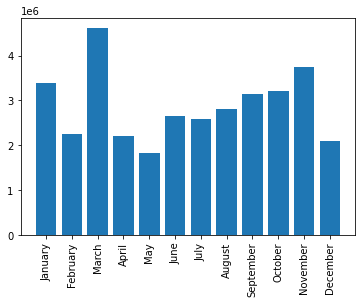

In [12]:
import matplotlib.pyplot as plt
df.sort_values(by='Order Date',inplace=True)
df['Total'] = df['Price Each'] * df['Quantity Ordered']
x1 = df.groupby('month').agg({'Total':'sum'})
plt.bar(df['month'].unique(),x1['Total'])
plt.xticks(size=10,rotation='vertical')
plt.show()

In [ ]:
ct = df.groupby('City').agg({'Total':'sum'})
plt.bar(ct.index,ct['Total'])
plt.xticks(ct.index,size=10,rotation='vertical')
plt.xlabel('City Names')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [86]:
# df
# x2 = df.groupby('month').agg({'Total':'sum'})
# x2 = x2.reset_index()
# x2['month'] = pd.to_datetime(x2['month'],format="%B").dt.month
# x2.sort_values(by='month',inplace=True)
# x2['month']
# # plt.bar(x2.index,x2['Total'])
# # plt.xticks(size=10,rotation='vertical')
# # plt.show()

4      1
3      2
7      3
0      4
8      5
6      6
5      7
1      8
11     9
10    10
9     11
2     12
Name: month, dtype: int64

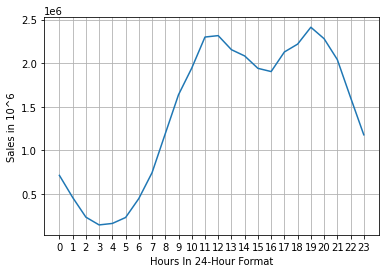

In [13]:
ad = df.groupby(df['Order Date'].dt.hour).agg({'Total':'sum'})
plt.plot(ad.index,ad['Total'])
plt.xlabel("Hours In 24-Hour Format")
plt.ylabel("Sales in 10^6")
plt.xticks(ad.index,size=10)
plt.grid()
plt.show()

In [55]:
tmp = df.groupby('Product').agg({'Quantity Ordered':sum,'Price Each':'mean'})
tmp
    

,Quantity Ordered,Price Each
Product,,
20in Monitor,4129,109.99
27in 4K Gaming Monitor,6244,389.99
27in FHD Monitor,7550,149.99
34in Ultrawide Monitor,6199,379.99
AA Batteries (4-pack),27635,3.84
AAA Batteries (4-pack),31017,2.99
Apple Airpods Headphones,15661,150.00
Bose SoundSport Headphones,13457,99.99
Flatscreen TV,4819,300.00


In [43]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,month,Total
143792,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",New York City (NY),January,11.99
144602,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",San Francisco (CA),January,11.95
145955,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",New York City (NY),January,150.00
146609,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",Dallas (TX),January,2.99
145962,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",Atlanta (GA),January,23.90
...,...,...,...,...,...,...,...,...,...
8914,304165,AAA Batteries (4-pack),1,2.99,2020-01-01 04:13:00,"825 Adams St, Portland, OR 97035",Portland (OR),January,2.99
3633,299125,USB-C Charging Cable,1,11.95,2020-01-01 04:21:00,"754 Hickory St, New York City, NY 10001",New York City (NY),January,11.95
10667,305840,Bose SoundSport Headphones,1,99.99,2020-01-01 04:54:00,"784 River St, San Francisco, CA 94016",San Francisco (CA),January,99.99
5103,300519,Bose SoundSport Headphones,1,99.99,2020-01-01 05:13:00,"657 Spruce St, New York City, NY 10001",New York City (NY),January,99.99
